In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing  # imputing and scale
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt1
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from sklearn.naive_bayes import MultinomialNB  #naive bayes
pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100)  # display rows
from sklearn.metrics import *
from sklearn.linear_model import *
import itertools 
from sklearn.metrics import *   
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier  #classification algorithm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV

In [60]:
df = pd.read_csv('output.csv')
df.head()

,CustomerId,AppointmentID,Cust Age,Cust Gender,Build Year,Vehicle Age,Vehicle Type,Vehicle OEM,Appointment Day,AppointmentDay,ScheduledDate,ScheduledDay,SMS_received,Reminder received,Issue Arena,Issue Criticality,Issue Severity,Last Serviced date,Techinician assigned,New Issue,No-show
0,1563014,6149830,25,Male,2002,20,Hatchback,BMW,09/17/2022,Saturday,10-03-2022 8:25,Monday,False,False,Replace rear brakes,10,10,10-03-2022,False,False,False
1,4065606,6707205,52,Male,2017,5,Minivan,GMC,05/18/2022,Wednesday,06-04-2022 2:30,Saturday,False,False,Battery Maintenance Service,2,3,06-04-2022,False,False,False
2,811817,5568312,27,Male,2006,16,Wagon,Nissan,06/11/2022,Saturday,06-30-2022 6:40,Thursday,False,False,Install Premium Fuel Treatment,2,1,06-30-2022,True,False,False
3,3737986,8797591,26,Male,2007,15,SUV,BMW,08/25/2022,Thursday,09-09-2022 3:25,Friday,True,False,Install Nitrogen into all Tires,2,2,09-09-2022,False,True,True
4,697291,3057583,26,Male,2009,13,Hatchback,FIAT,07/12/2022,Tuesday,07-12-2022 8:50,Tuesday,False,True,Replace cabin air filter,5,2,07-12-2022,True,False,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300156 entries, 0 to 300155
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CustomerId            300156 non-null  int64 
 1   AppointmentID         300156 non-null  int64 
 2   Cust Age              300156 non-null  int64 
 3   Cust Gender           300156 non-null  object
 4   Build Year            300156 non-null  int64 
 5   Vehicle Age           300156 non-null  int64 
 6   Vehicle Type          300156 non-null  object
 7   Vehicle OEM           300156 non-null  object
 8   Appointment Day       300156 non-null  object
 9   AppointmentDay        300156 non-null  object
 10  ScheduledDate         300156 non-null  object
 11  ScheduledDay          300156 non-null  object
 12  SMS_received          300156 non-null  bool  
 13  Reminder received     300156 non-null  bool  
 14  Issue Arena           300156 non-null  object
 15  Issue Criticality

In [62]:
df.rename(columns = lambda x: x.lower().replace(' ','_'), inplace = True)
df.columns
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace = True)
df.columns

Index(['customerid', 'appointmentid', 'cust_age', 'cust_gender', 'build_year',
       'vehicle_age', 'vehicle_type', 'vehicle_oem', 'appointment_day',
       'appointmentday', 'scheduleddate', 'scheduledday', 'sms_received',
       'reminder_received', 'issue_arena', 'issue_criticality',
       'issue_severity', 'last_serviced_date', 'techinician_assigned',
       'new_issue', 'no_show'],
      dtype='object')

In [63]:
# Grouping and binning customer age, vehicle age, issue criticality and issue severity
ranges = [1,3,7,11]
labels = [0, 1, 2]
cust_age_range = [15,30,50,70,85]
cust_age_labels = [0, 1, 2, 3]
vehicle_age_range = [0,10,20,30,100]
vehicle_age_labels = [0,1,2,3]

df['cust_age'] = pd.cut(df['cust_age'], bins = cust_age_range, labels = cust_age_labels, right = False)
df['vehicle_age'] = pd.cut(df['vehicle_age'], bins = vehicle_age_range, labels = vehicle_age_labels, right = False)
df['issue_criticality'] = pd.cut(df['issue_criticality'], bins = ranges, labels = labels, right = False)
df['issue_severity'] = pd.cut(df['issue_severity'], bins = ranges, labels = labels, right = False)
df.head()

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,appointment_day,appointmentday,scheduleddate,scheduledday,sms_received,reminder_received,issue_arena,issue_criticality,issue_severity,last_serviced_date,techinician_assigned,new_issue,no_show
0,1563014,6149830,0,Male,2002,2,Hatchback,BMW,09/17/2022,Saturday,10-03-2022 8:25,Monday,False,False,Replace rear brakes,2,2,10-03-2022,False,False,False
1,4065606,6707205,2,Male,2017,0,Minivan,GMC,05/18/2022,Wednesday,06-04-2022 2:30,Saturday,False,False,Battery Maintenance Service,0,1,06-04-2022,False,False,False
2,811817,5568312,0,Male,2006,1,Wagon,Nissan,06/11/2022,Saturday,06-30-2022 6:40,Thursday,False,False,Install Premium Fuel Treatment,0,0,06-30-2022,True,False,False
3,3737986,8797591,0,Male,2007,1,SUV,BMW,08/25/2022,Thursday,09-09-2022 3:25,Friday,True,False,Install Nitrogen into all Tires,0,0,09-09-2022,False,True,True
4,697291,3057583,0,Male,2009,1,Hatchback,FIAT,07/12/2022,Tuesday,07-12-2022 8:50,Tuesday,False,True,Replace cabin air filter,1,0,07-12-2022,True,False,False


In [64]:
# Creating dummy variable for Vehicle Type

df['vehicle_type'].replace('Hatchback', 0, inplace=True)
df['vehicle_type'].replace(' Hatchback', 0, inplace=True)
df['vehicle_type'].replace('Minivan', 1, inplace=True)
df['vehicle_type'].replace(' Wagon', 2, inplace=True)
df['vehicle_type'].replace('Wagon', 2, inplace=True)
df['vehicle_type'].replace('SUV', 3, inplace=True)
df['vehicle_type'].replace('SUV1992', 3, inplace=True)
df['vehicle_type'].replace('SUV2020', 3, inplace=True)
df['vehicle_type'].replace(' Convertible', 4, inplace=True)
df['vehicle_type'].replace('Convertible', 4, inplace=True)
df['vehicle_type'].replace('Sedan', 5, inplace=True)
df['vehicle_type'].replace(' Sedan', 5, inplace=True)
df['vehicle_type'].replace('Van', 6, inplace=True)
df['vehicle_type'].replace('Pickup', 7, inplace=True)
df['vehicle_type'].replace('Coupe', 8, inplace=True)
df['vehicle_type'].replace(' Coupe', 8, inplace=True)


In [65]:
df.vehicle_type.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [66]:
# Categorizing scheduled day and appointment day into 'Weekday' and 'Weekend'

df[['appointmentday']] = df[['appointmentday']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['appointmentday']] = df[['appointmentday']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))

df[['scheduledday']] = df[['scheduledday']].replace(dict.fromkeys(['Monday','Tuesday','Wednesday','Thursday','Friday'], 'Weekday'))
df[['scheduledday']] = df[['scheduledday']].replace(dict.fromkeys(['Saturday','Sunday'], 'Weekend'))


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300156 entries, 0 to 300155
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   customerid            300156 non-null  int64   
 1   appointmentid         300156 non-null  int64   
 2   cust_age              300139 non-null  category
 3   cust_gender           300156 non-null  object  
 4   build_year            300156 non-null  int64   
 5   vehicle_age           300156 non-null  category
 6   vehicle_type          300156 non-null  int64   
 7   vehicle_oem           300156 non-null  object  
 8   appointment_day       300156 non-null  object  
 9   appointmentday        300156 non-null  object  
 10  scheduleddate         300156 non-null  object  
 11  scheduledday          300156 non-null  object  
 12  sms_received          300156 non-null  bool    
 13  reminder_received     300156 non-null  bool    
 14  issue_arena           300156 non-nul

In [68]:
# Converting boolean variables to binary/numeric 0/1

df['sms_received'].replace(True, 1,inplace=True)
df['sms_received'].replace(False, 0,inplace=True)
df['reminder_received'].replace(True, 1,inplace=True)
df['reminder_received'].replace(False, 0,inplace=True)
df['new_issue'].replace(True, 1,inplace=True)
df['new_issue'].replace(False, 0,inplace=True)
df['no_show'].replace(True,1,inplace=True)
df['no_show'].replace(False,0,inplace=True)
df['cust_gender'].replace('Female', 0,inplace=True)
df['cust_gender'].replace('Male', 1,inplace=True)
df['scheduledday'].replace('Weekday', 0,inplace=True)
df['scheduledday'].replace('Weekend', 1,inplace=True)
df['appointmentday'].replace('Weekday', 0,inplace=True)
df['appointmentday'].replace('Weekend', 1,inplace=True)
df.head()

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,appointment_day,appointmentday,scheduleddate,scheduledday,sms_received,reminder_received,issue_arena,issue_criticality,issue_severity,last_serviced_date,techinician_assigned,new_issue,no_show
0,1563014,6149830,0,1,2002,2,0,BMW,09/17/2022,Weekend,10-03-2022 8:25,0,0,0,Replace rear brakes,2,2,10-03-2022,False,0,0
1,4065606,6707205,2,1,2017,0,1,GMC,05/18/2022,Weekday,06-04-2022 2:30,1,0,0,Battery Maintenance Service,0,1,06-04-2022,False,0,0
2,811817,5568312,0,1,2006,1,2,Nissan,06/11/2022,Weekend,06-30-2022 6:40,0,0,0,Install Premium Fuel Treatment,0,0,06-30-2022,True,0,0
3,3737986,8797591,0,1,2007,1,3,BMW,08/25/2022,Weekday,09-09-2022 3:25,0,1,0,Install Nitrogen into all Tires,0,0,09-09-2022,False,1,1
4,697291,3057583,0,1,2009,1,0,FIAT,07/12/2022,Weekday,07-12-2022 8:50,0,0,1,Replace cabin air filter,1,0,07-12-2022,True,0,0


In [69]:
df['techinician_assigned'].replace(True, 1,inplace=True)
df['techinician_assigned'].replace(False, 0,inplace=True)
df.head()

,customerid,appointmentid,cust_age,cust_gender,build_year,vehicle_age,vehicle_type,vehicle_oem,appointment_day,appointmentday,scheduleddate,scheduledday,sms_received,reminder_received,issue_arena,issue_criticality,issue_severity,last_serviced_date,techinician_assigned,new_issue,no_show
0,1563014,6149830,0,1,2002,2,0,BMW,09/17/2022,Weekend,10-03-2022 8:25,0,0,0,Replace rear brakes,2,2,10-03-2022,0,0,0
1,4065606,6707205,2,1,2017,0,1,GMC,05/18/2022,Weekday,06-04-2022 2:30,1,0,0,Battery Maintenance Service,0,1,06-04-2022,0,0,0
2,811817,5568312,0,1,2006,1,2,Nissan,06/11/2022,Weekend,06-30-2022 6:40,0,0,0,Install Premium Fuel Treatment,0,0,06-30-2022,1,0,0
3,3737986,8797591,0,1,2007,1,3,BMW,08/25/2022,Weekday,09-09-2022 3:25,0,1,0,Install Nitrogen into all Tires,0,0,09-09-2022,0,1,1
4,697291,3057583,0,1,2009,1,0,FIAT,07/12/2022,Weekday,07-12-2022 8:50,0,0,1,Replace cabin air filter,1,0,07-12-2022,1,0,0


In [70]:
df.rename(columns = {'customerid':'customer_id', 'appointmentid':'appointment_id','appointment_day':'appointment_date','appointmentday':'appointment_day',
          'scheduleddate':'scheduled_date','scheduledday':'scheduled_day','techinician_assigned':'technician_assigned'},inplace = True)
df.columns

Index(['customer_id', 'appointment_id', 'cust_age', 'cust_gender',
       'build_year', 'vehicle_age', 'vehicle_type', 'vehicle_oem',
       'appointment_date', 'appointment_day', 'scheduled_date',
       'scheduled_day', 'sms_received', 'reminder_received', 'issue_arena',
       'issue_criticality', 'issue_severity', 'last_serviced_date',
       'technician_assigned', 'new_issue', 'no_show'],
      dtype='object')

In [74]:
# Choosing specific columns for modelling in input dataframe
# Dropping correlated column 'build_year' and just keepung vehicle_age

df_input = df[['cust_age','cust_gender','vehicle_type','vehicle_age','appointment_day','scheduled_day','sms_received','reminder_received',
               'issue_criticality','issue_severity','technician_assigned','new_issue']]
df_input

,cust_age,cust_gender,vehicle_type,vehicle_age,appointment_day,scheduled_day,sms_received,reminder_received,issue_criticality,issue_severity,technician_assigned,new_issue
0,0,1,0,2,1,0,0,0,2,2,0,0
1,2,1,1,0,0,1,0,0,0,1,0,0
2,0,1,2,1,1,0,0,0,0,0,1,0
3,0,1,3,1,0,0,1,0,0,0,0,1
4,0,1,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
300151,2,1,8,0,0,1,0,0,0,0,1,1
300152,0,0,0,2,0,0,1,1,1,2,1,1
300153,1,0,3,1,1,0,0,0,0,0,0,0
300154,1,1,0,0,0,1,1,1,1,1,1,0


In [75]:
# Splitting dataframe into training, validation and test data

y = df['no_show']

train_X, temp_X, train_y, temp_y = train_test_split(df_input, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)


print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

Training :  (150078, 12)
Validation :  (90046, 12)
Test :  (60032, 12)


<AxesSubplot:xlabel='k'>

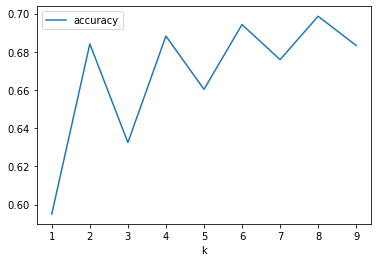

In [76]:
# kNN Algorithm to predict Show/No Show

results = []
for k in range(1, 10): # iterating over different values for k
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1).fit(train_X, train_y) #model 
        results.append({
            'k': k,
            'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='accuracy')
results.index=results.k
results=results.drop('k',axis=1)
results.plot()

In [77]:
# Train a classifier for different values of k and different types of distances

metric_list=['euclidean','manhattan','chebyshev','minkowski',]
             
results = []
for k in range(1, 10):
    for m in metric_list:
        knn = KNeighborsClassifier(n_neighbors=k,metric=m,n_jobs=-1).fit(train_X, train_y)
        results.append({
            'k_distance': str(k)+" "+str(m),
            'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='accuracy',ascending=False)

,k_distance,accuracy
30,8 chebyshev,0.701097
22,6 chebyshev,0.698687
29,8 manhattan,0.698665
28,8 euclidean,0.698565
31,8 minkowski,0.698565
23,6 minkowski,0.694223
20,6 euclidean,0.694223
21,6 manhattan,0.694190
14,4 chebyshev,0.692468
15,4 minkowski,0.688193


In [80]:
# Fit the model with training data with the best chosen value of k and distance measure type

knn = KNeighborsClassifier(n_neighbors=8,metric='chebyshev',n_jobs=-1)
knn.fit(train_X, train_y)

KNeighborsClassifier(metric='chebyshev', n_jobs=-1, n_neighbors=8)

In [82]:
# Predict 'y' value (no-show column) on test data and create confusion matrix and classification report

pred_y = knn.predict(test_X)

conf_matrix = metrics.confusion_matrix(test_y, pred_y)
print("Confusion Matrix:")
print(conf_matrix)

classification_report = metrics.classification_report(test_y, pred_y)
print("Classification Report:",)
print (classification_report)


Confusion Matrix:
[[41362  1658]
 [16328   684]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     43020
           1       0.29      0.04      0.07     17012

    accuracy                           0.70     60032
   macro avg       0.50      0.50      0.45     60032
weighted avg       0.60      0.70      0.61     60032



In [83]:
from sklearn.metrics import precision_recall_fscore_support

res = []
for l in [0,1]:
    prec,recall,fscore,support = precision_recall_fscore_support(np.array(test_y)==l,
                                                      np.array(pred_y)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
    
comparison = pd.DataFrame(res,columns = ['class','sensitivity','specificity'])
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]

# Sensitivity is Recall of 0 (Show) and Specificity is recall of 1 (No Show). In our case, we should look at specificity values

comparison['accuracy'] = (TP+TN)/(TP+TN+FN+FP)
comparison

,class,sensitivity,specificity,accuracy
0,0,0.040207,0.961460,0.700393
1,1,0.961460,0.040207,0.700393


C:\Users\nikit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Traning data
accuracy:  0.7248430815975693
Precision:  0.731873574091592
Recall:  0.9745570405772134

Validation data
accuracy:  0.701097216977989
Precision:  0.718238237775492
Recall:  0.9608082619585047

Test data
accuracy:  0.7003931236673774
Precision:  0.7169700121338187
Recall:  0.9614597861459786

               Predictor  coefficient
0              cust_age          0.0
1           cust_gender          0.0
2          vehicle_type          0.0
3           vehicle_age          0.0
4       appointment_day          0.0
5         scheduled_day          0.0
6          sms_received          0.0
7     reminder_received          0.0
8     issue_criticality          0.0
9        issue_severity          0.0
10  technician_assigned          0.0
11            new_issue          0.0


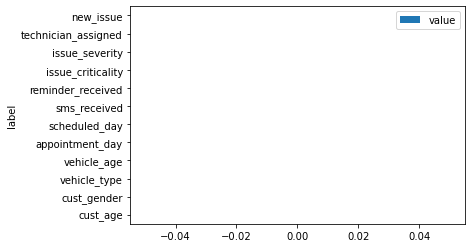

In [84]:
# Logistic Regression


model=LogisticRegression()
reg = model.fit(train_X, train_y)
pred_train = reg.predict(train_X)
pred_valid = reg.predict(valid_X)
print("\nTraning data")
print('accuracy: ',accuracy_score(train_y, knn.predict(train_X)))
print('Precision: ',precision_score(list(train_y),list(knn.predict(train_X)),pos_label=0))
print('Recall: ',recall_score(train_y,knn.predict(train_X),pos_label=0))

print("\nValidation data")
print('accuracy: ',accuracy_score(valid_y, knn.predict(valid_X)))
print('Precision: ',precision_score(list(valid_y),list(knn.predict(valid_X)),pos_label=0))
print('Recall: ',recall_score(valid_y,knn.predict(valid_X),pos_label=0))

print("\nTest data")
print('accuracy: ',accuracy_score(test_y, knn.predict(test_X)))
print('Precision: ',precision_score(list(test_y),list(knn.predict(test_X)),pos_label=0))
print('Recall: ',recall_score(test_y,knn.predict(test_X),pos_label=0))

AA=pd.DataFrame({'Predictor': df_input.columns, 'coefficient': model.coef_[0]})
print('\n',AA)
AB = pd.DataFrame({'label': df_input.columns, 'value': model.coef_[0]})
AC = AB.plot.barh(x='label', y='value')
